<a href="https://colab.research.google.com/github/ClarissePansoy/CS2-A_PANSOY/blob/main/2A_PANSOY_EXER6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1: Data Loading and Preprocessing

In [ ]:
#Load the Dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

dataset = pd.read_csv('/content/onlinefoods.csv')
print(dataset.describe())

#Handle Missing Values
print(dataset.isnull().sum)

#Encode Categorical Variables
dataset_encoded = pd.get_dummies(dataset, columns=['Gender', 'Marital Status', 'Occupation', 'Monthly Income', 'Educational Qualifications', 'Output', 'Feedback' ])
print(dataset_encoded)

#featuring Selection
dataset_dummies = pd.get_dummies(dataset, drop_first=True)
dataset_dummies['required_age'] = (dataset['Age']>18).astype(int)
x = dataset_dummies.drop(['Age', 'Family size','latitude', 'longitude', 'Pin code'],axis=1)
y = dataset_dummies['required_age']


              Age  Family size    latitude   longitude       Pin code
count  388.000000   388.000000  388.000000  388.000000     388.000000
mean    24.628866     3.280928   12.972058   77.600160  560040.113402
std      2.975593     1.351025    0.044489    0.051354      31.399609
min     18.000000     1.000000   12.865200   77.484200  560001.000000
25%     23.000000     2.000000   12.936900   77.565275  560010.750000
50%     24.000000     3.000000   12.977000   77.592100  560033.500000
75%     26.000000     4.000000   12.997025   77.630900  560068.000000
max     33.000000     6.000000   13.102000   77.758200  560109.000000
<bound method NDFrame._add_numeric_operations.<locals>.sum of        Age  Gender  Marital Status  Occupation  Monthly Income  \
0    False   False           False       False           False   
1    False   False           False       False           False   
2    False   False           False       False           False   
3    False   False           False       Fal

# Part 2: Exploratory Data Analysis (EDA)

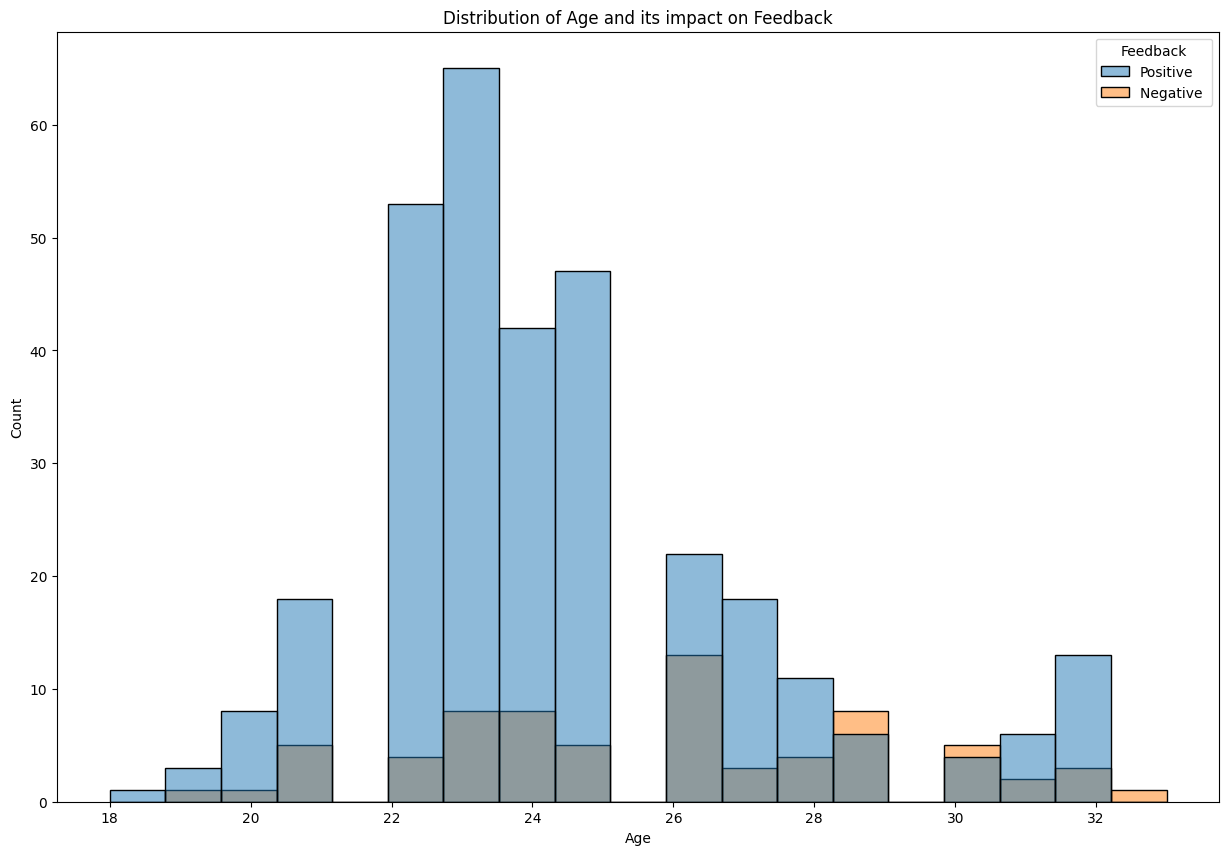

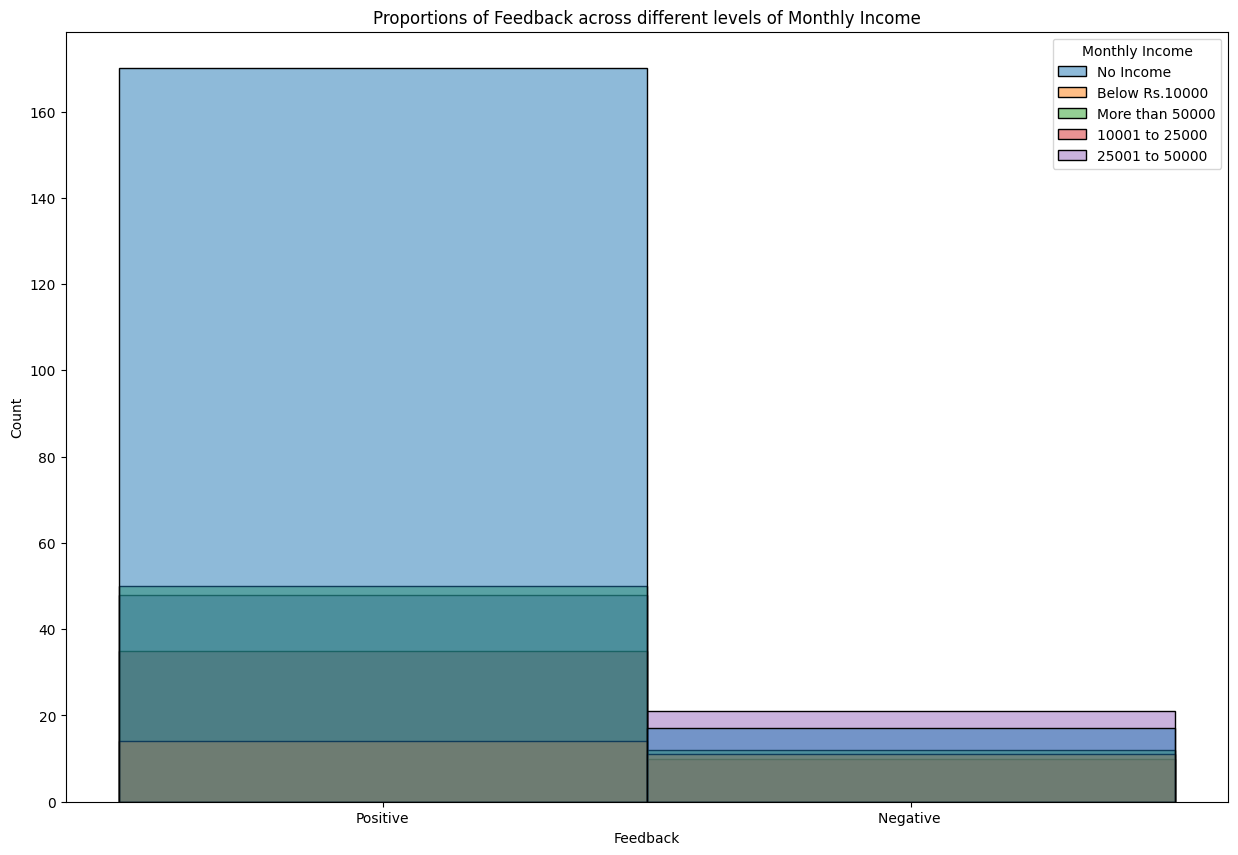

<ipython-input-125-51d817cf16ab>:15: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sns.heatmap(dataset.corr(), cmap="YlGnBu", annot=True)


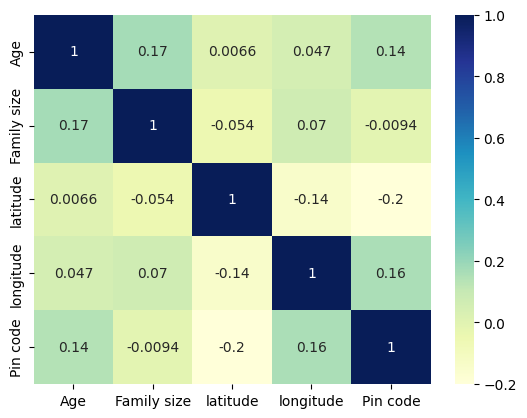

In [ ]:
#Descriptive Statistics
Statistics = dataset.describe()

#Visualizations
plt.figure(figsize=(15, 10))
plt.title("Distribution of Age and its impact on Feedback")
sns.histplot(x="Age", hue="Feedback", data=dataset)
plt.show()

plt.figure(figsize=(15, 10))
plt.title("Proportions of Feedback across different levels of Monthly Income")
sns.histplot(x="Feedback", hue="Monthly Income", data=dataset)
plt.show()

dataplot = sns.heatmap(dataset.corr(), cmap="YlGnBu", annot=True)
plt.show()

# Part 3: Logistic Regression Model

In [ ]:
#Build the Model
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

scaler=StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

model = LogisticRegression()
model.fit(x_train_scaled, y_train)


#Model Evaluation
y_pred = model.predict(x_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix: ")
print(conf_matrix)
print("Classification Report: ")
print(class_report)



Accuracy: 1.0
Confusion Matrix: 
[[78]]
Classification Report: 
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        78

    accuracy                           1.00        78
   macro avg       1.00      1.00      1.00        78
weighted avg       1.00      1.00      1.00        78



# Part 4: Data Analysis and Visualization

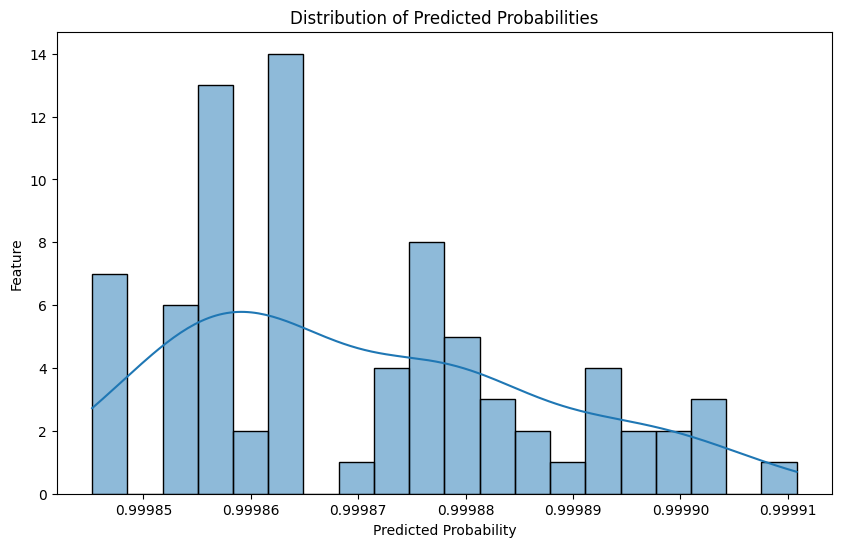

In [ ]:
#Feature Importance
feature_importance = pd.DataFrame({'Feature': x.columns, 'Importance': model.coef_[0]})
feature_importance.sort_values(by='Importance', ascending=False, inplace=True)

#First, we must fit a logistic regression model to the data.Then, we can look at the model's coefficients to see how each characteristic affects feedback prediction. Finally, we can display the coefficients to acquire an understanding of each feature's relative relevance.

#Prediction Insights
y_pred_prob = model.predict_proba(x_test_scaled)[:, 1]
plt.figure(figsize=(10, 6))
sns.histplot(y_pred_prob, bins=20, kde=True)
plt.title('Distribution of Predicted Probabilities')
plt.xlabel('Predicted Probability')
plt.ylabel('Feature')
plt.show()

##Visualizing the distribution of projected probabilities provides useful insights into the model's prediction process and can aid in assessing its performance and reliability.